In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [6]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [7]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

In [8]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [9]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=16,kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Dropout(0.25))

In [21]:
model.add(Flatten())

In [22]:
model.add(Dense(128, activation='relu'))

In [23]:
model.add(Dropout(0.5))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=300, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 64s - loss: 0.4960 - acc: 0.8446 - val_loss: 0.1034 - val_acc: 0.9695
Epoch 2/10
 - 60s - loss: 0.1393 - acc: 0.9580 - val_loss: 0.0703 - val_acc: 0.9788
Epoch 3/10
 - 60s - loss: 0.1026 - acc: 0.9690 - val_loss: 0.0541 - val_acc: 0.9839
Epoch 4/10
 - 61s - loss: 0.0817 - acc: 0.9752 - val_loss: 0.0482 - val_acc: 0.9857
Epoch 5/10
 - 60s - loss: 0.0708 - acc: 0.9780 - val_loss: 0.0439 - val_acc: 0.9862
Epoch 6/10
 - 60s - loss: 0.0627 - acc: 0.9812 - val_loss: 0.0407 - val_acc: 0.9880
Epoch 7/10
 - 60s - loss: 0.0546 - acc: 0.9836 - val_loss: 0.0356 - val_acc: 0.9898
Epoch 8/10
 - 60s - loss: 0.0480 - acc: 0.9857 - val_loss: 0.0356 - val_acc: 0.9903
Epoch 9/10
 - 60s - loss: 0.0456 - acc: 0.9861 - val_loss: 0.0330 - val_acc: 0.9906
Epoch 10/10
 - 61s - loss: 0.0425 - acc: 0.9863 - val_loss: 0.0323 - val_acc: 0.9898


In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

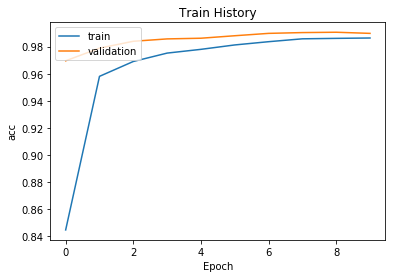

In [29]:
show_train_history(train_history,'acc', 'val_acc')

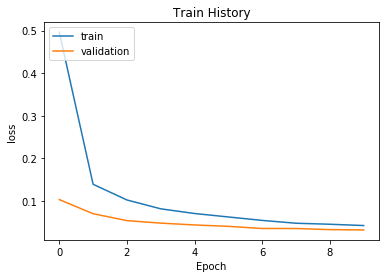

In [31]:
show_train_history(train_history,'loss', 'val_loss')

In [32]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 462us/step


0.9917

In [33]:
prediction = model.predict_classes(x_Test4D_normalize)

In [34]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [35]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx += 1
    plt.show()

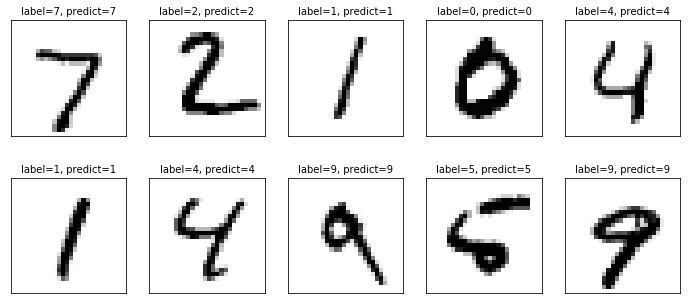

In [36]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0)

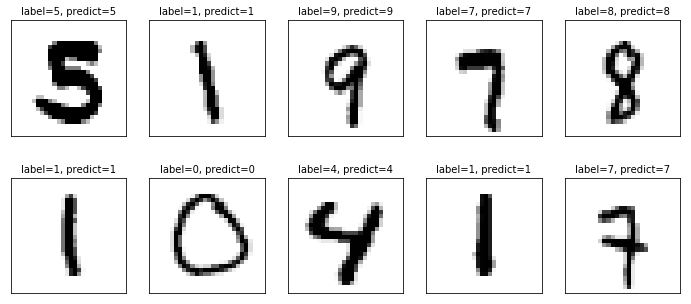

In [38]:
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=1003)

In [39]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,0,0,3,1
1,0,1128,2,0,0,1,1,1,2,0
2,1,1,1025,1,1,0,0,2,1,0
3,0,0,1,1007,0,1,0,0,1,0
4,0,0,0,0,977,0,0,0,1,4
5,1,0,0,6,0,883,1,0,0,1
6,2,2,0,0,1,3,949,0,1,0
7,0,2,7,3,0,0,0,1012,1,3
8,1,0,1,2,0,0,0,2,966,2
